# 行うこと

0. ライブラリーやデータのインポート
1. データの前処理：　setup()
2. モデルの比較： compare_models()
3. 分析モデルの生成： create_model()
4. チューニング： tune_model()
5. 可視化： plot_model()
6. 評価： evaluate_model()
7. 予測： finalize_model(), predict_model()

# 0. ライブラリーのインポート

In [1]:
import pandas as pd
from pycaret.classification import *

In [2]:
print(pycaret.__version__)  # 2.2.0が表示

2.2.0


In [3]:
import sklearn
print(sklearn.__version__)

0.23.2


# データのインポート

In [4]:
# 使用するデータの読み込み 
from pycaret.datasets import get_data 
data = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
# 95％を学習データ、5%をテストデータ(Unseen Dataと呼ぶ)に分ける
employee_data = data.sample(frac =0.95, random_state = 786).reset_index(drop=True)
employee_data_unseen = data.drop(employee_data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(employee_data.shape))
print('Unseen Data For Predictions: ' + str(employee_data_unseen.shape))

Data for Modeling: (14249, 10)
Unseen Data For Predictions: (750, 10)


# 1. データの前処理

In [6]:
exp1 = setup(employee_data, target = 'left', ignore_features = None)

,Description,Value
0,session_id,6728
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14249, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# 2. モデルの比較

In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9879,0.9934,0.9607,0.9878,0.9740,0.9661,0.9663,0.0930
xgboost,Extreme Gradient Boosting,0.9856,0.9926,0.9590,0.9798,0.9692,0.9598,0.9599,0.3670
lightgbm,Light Gradient Boosting Machine,0.9852,0.9937,0.9526,0.9843,0.9682,0.9585,0.9587,0.6620
et,Extra Trees Classifier,0.9821,0.9921,0.9556,0.9684,0.9619,0.9502,0.9502,0.0940
catboost,CatBoost Classifier,0.9815,0.9934,0.9420,0.9789,0.9601,0.9480,0.9483,0.3430
dt,Decision Tree Classifier,0.9760,0.9716,0.9632,0.9376,0.9502,0.9344,0.9346,0.0210
gbc,Gradient Boosting Classifier,0.9746,0.9871,0.9226,0.9690,0.9452,0.9287,0.9292,0.1180
ada,Ada Boost Classifier,0.9599,0.9808,0.9086,0.9213,0.9149,0.8886,0.8887,0.0520
knn,K Neighbors Classifier,0.9316,0.9671,0.8993,0.8276,0.8618,0.8165,0.8179,0.1730
lr,Logistic Regression,0.8955,0.9369,0.7970,0.7705,0.7833,0.7146,0.7149,0.4150


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6728, verbose=0,
                       warm_start=False)

# 3. モデルの比較

In [8]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9830,0.9961,0.9451,0.9825,0.9634,0.9523,0.9526
1,0.9860,0.9923,0.9451,0.9956,0.9697,0.9606,0.9611
2,0.9920,0.9948,0.9747,0.9914,0.9830,0.9777,0.9778
3,0.9880,0.9904,0.9620,0.9870,0.9744,0.9665,0.9666
4,0.9870,0.9981,0.9661,0.9785,0.9723,0.9638,0.9638
5,0.9890,0.9973,0.9661,0.9870,0.9764,0.9692,0.9693
6,0.9960,0.9955,0.9873,0.9957,0.9915,0.9889,0.9889
7,0.9870,0.9905,0.9492,0.9956,0.9718,0.9633,0.9638
8,0.9870,0.9941,0.9576,0.9869,0.9720,0.9635,0.9637
9,0.9840,0.9845,0.9534,0.9783,0.9657,0.9552,0.9553


# 4. チューニング： tune_model()

これを実行した結果（最適化後）と実行前を比較すると、最適化対象とした評価指標が増加し最適化が行われたことが確認できます。※PyCaretの最適化はランダムグリッドサーチが採用されています。これを実行した結果（最適化後）と実行前を比較すると、最適化対象とした評価指標が増加し最適化が行われたことが確認できます。※PyCaretの最適化はランダムグリッドサーチが採用されています。

In [9]:
tuned_rf = tune_model(rf, n_iter = 10, optimize = 'Accuracy')
# より最適化の精度を上げる場合には、n_iter = 500 のように数字を増やす。時間短縮のために少なめにしている。

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9639,0.9857,0.8987,0.9467,0.9221,0.8986,0.8991
1,0.9659,0.9820,0.9114,0.9432,0.9270,0.9048,0.9051
2,0.9760,0.9855,0.9367,0.9610,0.9487,0.9330,0.9331
3,0.9739,0.9845,0.9409,0.9489,0.9449,0.9279,0.9279
4,0.9729,0.9853,0.9195,0.9644,0.9414,0.9238,0.9243
5,0.9739,0.9833,0.9110,0.9773,0.9430,0.9261,0.9271
6,0.9779,0.9889,0.9322,0.9735,0.9524,0.9380,0.9384
7,0.9689,0.9855,0.9237,0.9437,0.9336,0.9133,0.9134
8,0.9579,0.9811,0.9068,0.9145,0.9106,0.8831,0.8831
9,0.9689,0.9691,0.9068,0.9596,0.9325,0.9123,0.9129


# 5. 可視化： plot_model()

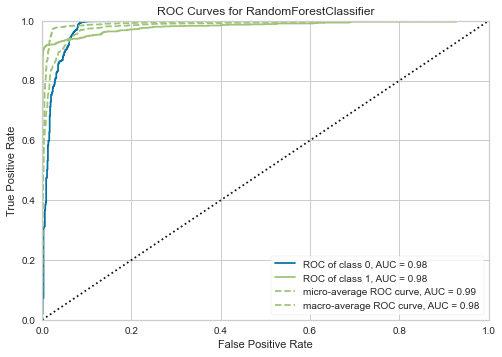

In [10]:
plot_model(tuned_rf)

# 6. 評価 : evaluate_mode

In [11]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 7. 予測： finalize_model(), predict_model()

In [12]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=-1, oob_score=False, random_state=6728, verbose=0,
                       warm_start=False)


In [13]:
#予測の実行
unseen_predictions = predict_model(final_rf, data = employee_data_unseen)
print(unseen_predictions)

     satisfaction_level  last_evaluation  number_project  \
0                  0.11             0.89               6   
1                  0.41             0.54               2   
2                  0.87             0.88               5   
3                  0.45             0.48               2   
4                  0.40             0.46               2   
..                  ...              ...             ...   
745                0.40             0.57               2   
746                0.37             0.48               2   
747                0.37             0.53               2   
748                0.11             0.96               6   
749                0.37             0.52               2   

     average_montly_hours  time_spend_company  Work_accident  \
0                     306                   4              0   
1                     152                   3              0   
2                     269                   5              0   
3                     1